# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model for ride durations based on a variety of variables. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi/ride share trip durations. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>




Recall that you have a helpful tool at your disposal! Refer to the [PACE strategy document](https://docs.google.com/document/d/1IejqJvJZQ5SgL6t7VKgvTuIEL9V93w4Wy1HriG8lQ2A/template/preview?resourcekey=0-sMQ1UzEI52Z9ydH1MS3_8Q) to help apply your learning, apply new problem-solving skills, and guide your approach to this project.

# Build a multiple linear regression model

As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. Please note that this activity is optional, and will not affect your completion of the course.

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **PACE stages**


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lr=LinearRegression()


`Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:

# Read in data from NYC TLC dataset provided and load into dataframe
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")  # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [5]:
print(df.shape)

print(df.info())


(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Use `.head()`.

Create `trip_duration`.

In [6]:
# Display data types of `tpep_dropoff_datetime`, `tpep_pickup_datetime`
print("Data type of tpep_dropoff_datetime:", df["tpep_dropoff_datetime"].dtype)
print("Data type of tpep_pickup_datetime:", df["tpep_pickup_datetime"].dtype)


# Convert `tpep_dropoff_datetime` to datetime format
df["drop_off_converted"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")


# Convert `tpep_pickup_datetime` to datetime format
df["pick_up_converted"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")


# Display data types of `drop_off_converted`, `pick_up_converted`
print("Data type of drop_off_converted:", df["drop_off_converted"].dtype)
print("Data type of pick_up_converted:", df["pick_up_converted"].dtype)


# Compute `trip_duration`
df["trip_duration"] = (df["drop_off_converted"] - df["pick_up_converted"])/np.timedelta64(1,"m")

# Display first ten rows of dataframe after adding the new columns
df.head(10)


Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: object
Data type of drop_off_converted: datetime64[ns]
Data type of pick_up_converted: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [9]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates
print("Shape of dataframe:", df.shape)
print("Shape of dataframe with duplicates dropped:", df.drop_duplicates().shape)

# Check for missing values in dataframe
print("Total count of missing values:", df.isna().sum().sum())

# Display missing values per column in dataframe
print("Missing values per column:")
df.isna().sum()



Shape of dataframe: (22699, 21)
Shape of dataframe with duplicates dropped: (22699, 21)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
drop_off_converted       0
pick_up_converted        0
trip_duration            0
dtype: int64

Use `.describe()`.

In [10]:
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


Create a scatterplot to visualize the relationship between variables of interest.

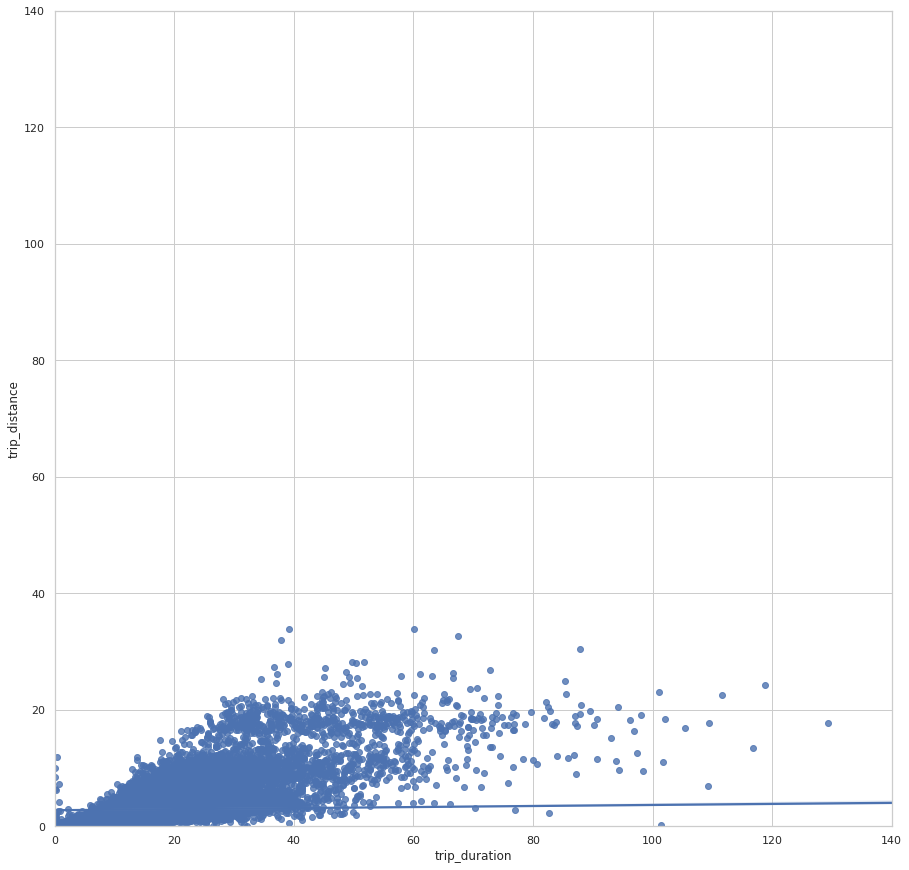

In [11]:
# Create a scatter plot of trip_duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x=df["trip_duration"], y=df["trip_distance"])
plt.ylim(0, 140)
plt.xlim(0,140)
plt.show()



Create a pairplot to visualize pairwise relationships between relevant variables.

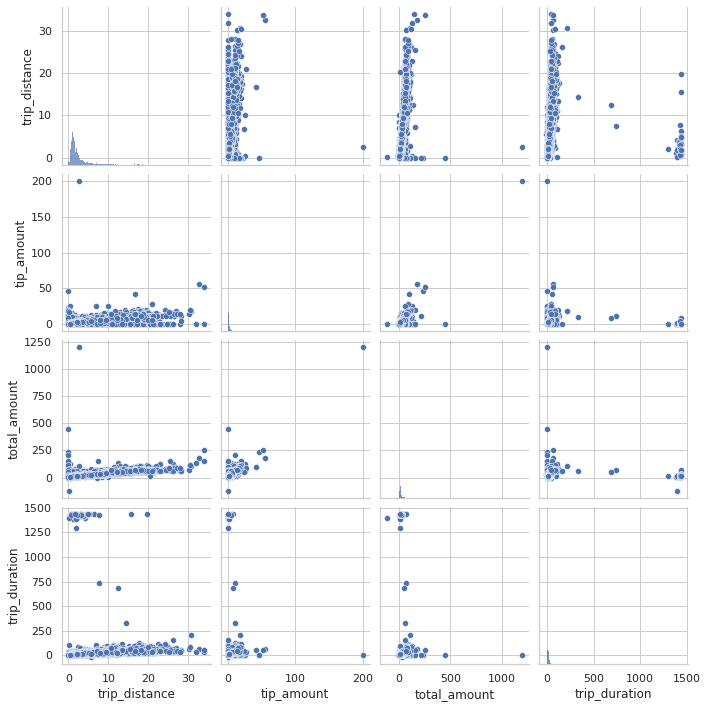

In [13]:
sns.pairplot(df[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration']]);



### Task 2b. Address any outliers

Use a boxplot to visualize any outliers.

Text(0.5, 1.0, '4 Variables with Outliers')

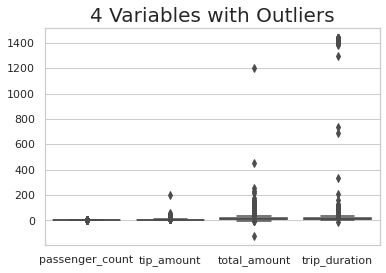

In [14]:
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=True);
g.set_title("4 Variables with Outliers",fontsize=20)



Use a boxplot to visualize the distribution of the data without outliers.

Text(0.5, 1.0, '4 Variables without Outliers')

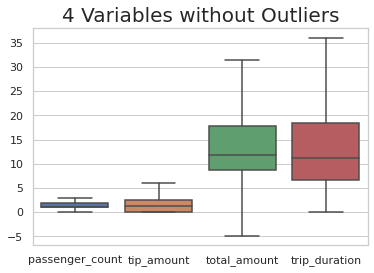

In [15]:
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False);
g.set_title("4 Variables without Outliers",fontsize=20)


Remove outliers as needed.

In [16]:
# Compute the 25th and 75th percentile values in `trip_duration`
percentile25 = df["trip_duration"].quantile(0.25)
percentile75 = df["trip_duration"].quantile(0.75)

# Compute the interquartile range for `trip_duration`
iqr = percentile75 - percentile25

# Compute the upper limit for `trip_duration`
upper_limit = percentile75 + 1.5 * iqr
upper_limit



35.983333333333334

In [18]:
# Remove outliers in `trip_duration`:
# Set values greater than the upper limit to the upper limit (approximately 36)
# Set values less than 0 to 0
df[df["trip_duration"] > 36] = 36 # Set val
df[df["trip_duration"] < 0] = 0

# Display descriptive stats after removing outliers in `trip_duration`
df["trip_duration"].describe()



count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

In [19]:
# Compute the 25th and 75th percentile values in `total_amount`
percentile25 = df["total_amount"].quantile(0.25)
percentile75 = df["total_amount"].quantile(0.75)

# Compute the interquartile range for `total_amount`
iqr = percentile75 - percentile25

# Compute the upper limit for `total_amount`
upper_limit = percentile75 + 1.5 * iqr
upper_limit



31.375

In [20]:
# Remove outliers in `total_amount`:
# Set values greater than the upper limit to the upper limit (approximately 32)
# Set values less than 0 to 0
df[df["total_amount"] > 32] = 32
df[df["total_amount"] < 0] = 0

# Display descriptive stats after removing outliers in `total_amount`
df["total_amount"].describe()

count    22699.000000
mean        14.481228
std          7.985722
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         32.000000
Name: total_amount, dtype: float64

### Task 2c. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [21]:
df.corr(method="pearson")



,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
Unnamed: 0,1.000000,-0.481317,-0.477442,-0.477195,-0.482017,0.246150,0.251366,-0.481182,-0.388059,-0.481992,-0.482116,-0.477809,-0.482132,-0.482138,-0.351186,-0.311006
VendorID,-0.481317,1.000000,0.991848,0.986482,0.998629,-0.526237,-0.513196,0.997372,0.815431,0.998017,0.998691,0.989050,0.998268,0.998690,0.737951,0.676771
passenger_count,-0.477442,0.991848,1.000000,0.979487,0.991264,-0.521962,-0.508229,0.990162,0.810410,0.990620,0.991338,0.981633,0.990931,0.991338,0.733307,0.673047
trip_distance,-0.477195,0.986482,0.979487,1.000000,0.987527,-0.528553,-0.519552,0.986164,0.888456,0.987172,0.987662,0.985290,0.987733,0.987656,0.822827,0.750085
RatecodeID,-0.482017,0.998629,0.991264,0.987527,1.000000,-0.525975,-0.513027,0.998668,0.816677,0.999239,0.999911,0.990328,0.999531,0.999923,0.739149,0.677597
PULocationID,0.246150,-0.526237,-0.521962,-0.528553,-0.525975,1.000000,0.344806,-0.525536,-0.457266,-0.525978,-0.526041,-0.521739,-0.526066,-0.526072,-0.418361,-0.380025
DOLocationID,0.251366,-0.513196,-0.508229,-0.519552,-0.513027,0.344806,1.000000,-0.512832,-0.456931,-0.513363,-0.512991,-0.510127,-0.513347,-0.513028,-0.421618,-0.380787
payment_type,-0.481182,0.997372,0.990162,0.986164,0.998668,-0.525536,-0.512832,1.000000,0.814424,0.997997,0.998720,0.984290,0.998334,0.998723,0.731241,0.675499
fare_amount,-0.388059,0.815431,0.810410,0.888456,0.816677,-0.457266,-0.456931,0.814424,1.000000,0.816151,0.816518,0.838561,0.817433,0.816525,0.980834,0.941852
extra,-0.481992,0.998017,0.990620,0.987172,0.999239,-0.525978,-0.513363,0.997997,0.816151,1.000000,0.999326,0.989988,0.998916,0.999326,0.740575,0.677547


Visualize a correlation heatmap of the data.

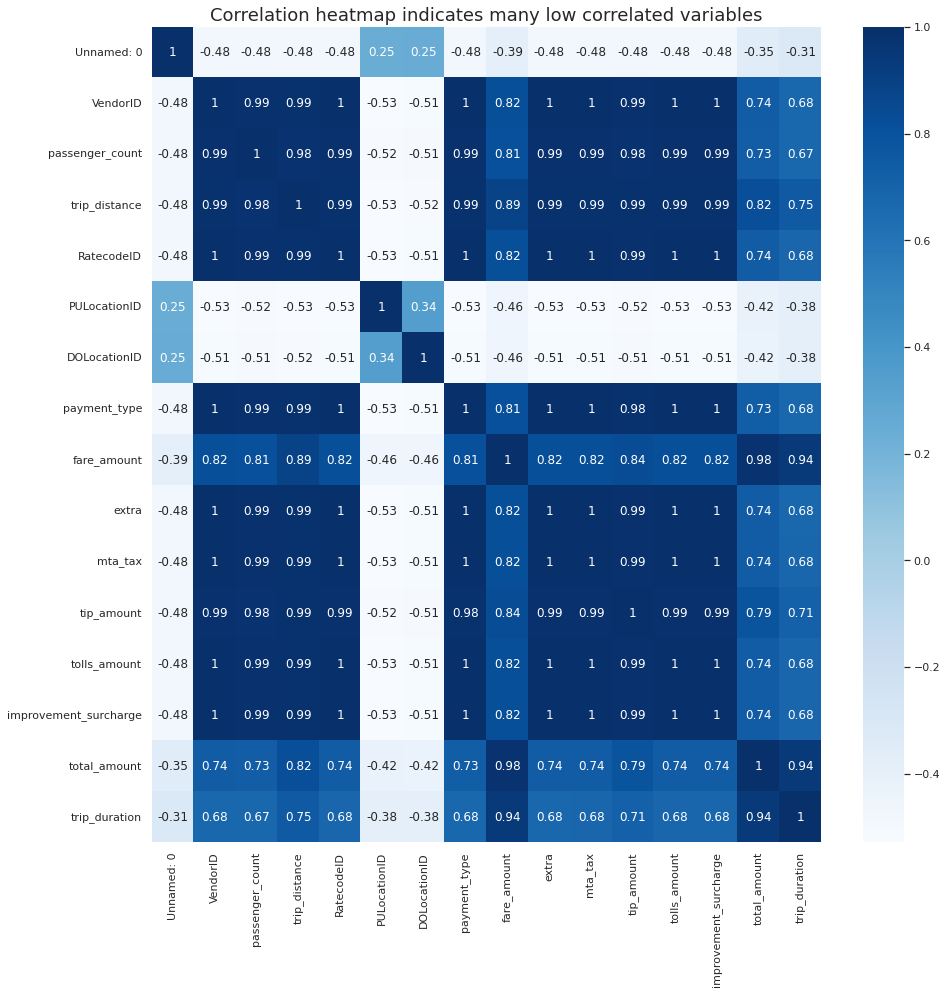

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")  #cmap="crest")
plt.title("Correlation heatmap indicates many low correlated variables",
          fontsize=18)
plt.show()


### Task 3a. Select outcome variable and features

Set your Y and X variables. Y represents the outcome variable, and X represents the features.

In [23]:
# Set Y variable
Y = df[["trip_duration"]]

# Remove the target column from the features
X = df.drop(columns="trip_duration")

# Display first few rows
X.head()



,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20


### Task 3b. Pre-process data

To help with processing time, consider dropping irrelevant and redundant columns.

In [24]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                   'drop_off_converted', 'pick_up_converted']
X = X.drop(columns_to_drop, axis=1)
X = X.loc[:, ~X.columns.str.contains("Unnamed")]
X.head()##



,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1,1,0.0,0.5,2.76,0.0,0.3
1,1.80,1,1,0.0,0.5,4.00,0.0,0.3
2,1.00,1,1,0.0,0.5,1.45,0.0,0.3
3,3.70,1,1,0.0,0.5,6.39,0.0,0.3
4,4.37,1,2,0.5,0.5,0.00,0.0,0.3


Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X scaled:", X_scaled)


X scaled: [[-0.18151313 -0.33715766 -0.37322483 ... -0.18534559 -0.33822608
  -0.33681081]
 [-0.34881939 -0.33715766 -0.37322483 ... -0.05279377 -0.33822608
  -0.33681081]
 [-0.43573173 -0.33715766 -0.37322483 ... -0.32538018 -0.33822608
  -0.33681081]
 ...
 [-0.49874318 -0.33715766 -0.26554074 ... -0.48038029 -0.33822608
  -0.33681081]
 [-0.28798075 -0.33715766 -0.37322483 ... -0.29865602 -0.33822608
  -0.33681081]
 [-0.31622726 -0.33715766 -0.37322483 ... -0.22917321 -0.33822608
  -0.33681081]]


### Task 3c. Build model

Create training and testing sets.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,  test_size=0.2, random_state=0)

Build and fit your model to the data.

In [27]:
lr=LinearRegression()
lr.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 3d. Evaluate model

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [30]:
# Evaluate the model performance on the training data

r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))



Coefficient of determination: 0.7452534633044856
R^2: 0.7452534633044856
MAE: 3.22075029252276
RMSE: 4.585993242787303


In [31]:
# Evaluate the model performance on the testing data

r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))


Coefficient of determination: 0.7385047347008925
R^2: 0.7385047347008925
MAE: 3.234740496347707
RMSE: 4.61036135956137


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [32]:

results = pd.DataFrame(data={"actual": Y_test["trip_duration"],
                             "predicted": Y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()


,actual,predicted,residual
5818,18.016667,15.655547,2.361120
18134,32.000000,32.000124,-0.000124
4655,5.883333,7.340598,-1.457264
7378,15.950000,18.320577,-2.370577
13914,11.900000,11.538481,0.361519


### Task 4b. Visualize model results

Create a scatterplot to visualize `predicted` over `actual`.

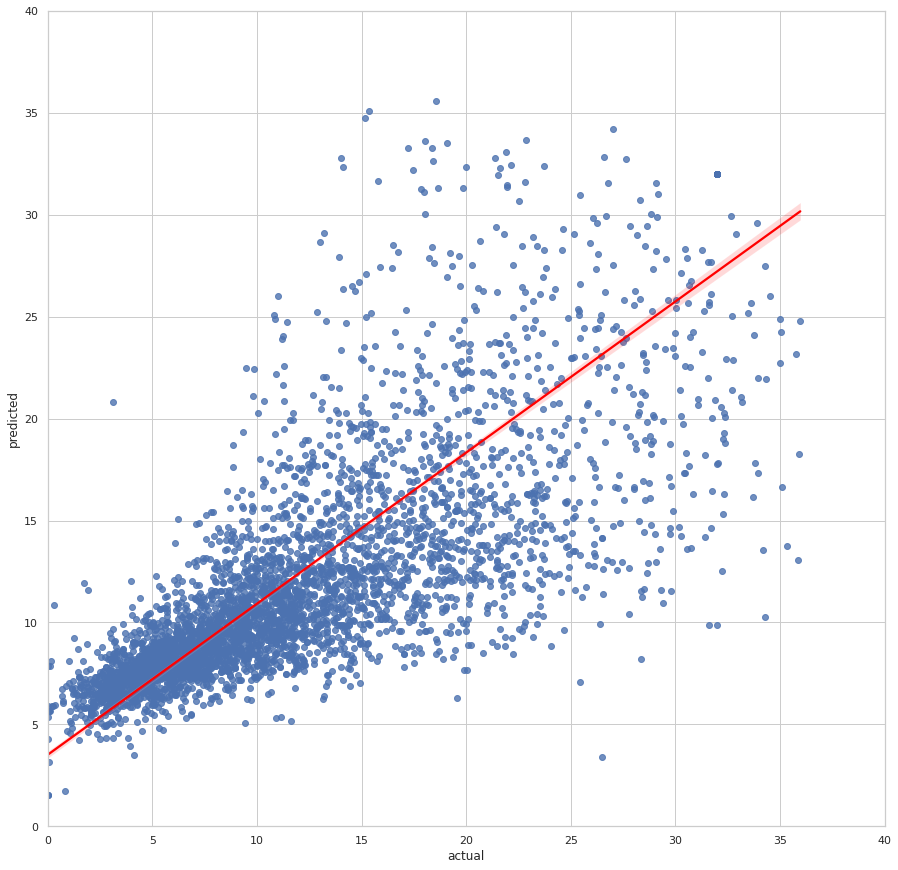

In [33]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x="actual",
           y="predicted",
           data=results, line_kws={"color": "red"})
plt.ylim(0, 40)
plt.xlim(0,40)
plt.show()



Visualize the distribution of the `residuals`.

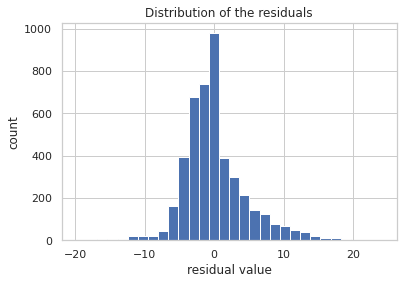

In [34]:
plt.hist(results["residual"], bins=30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()



Create a scatterplot of `residuals` over `predicted`.

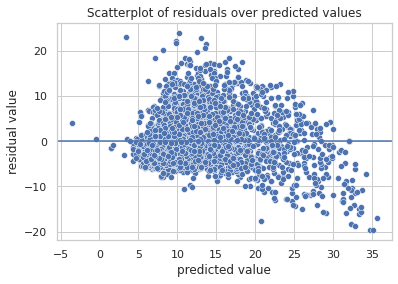

In [35]:
sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

